In [ ]:
!pip install wordcloud

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

# Importing required packages for visualization
from IPython.display import Image  
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string

from scipy import stats
from scipy.stats import skew
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV,GridSearchCV
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, scale, PowerTransformer, StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [3]:
import sys
import os
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import scipy.spatial.distance as ds_metric
from textblob import TextBlob, Word
import gensim 
import io
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS

In [4]:
import nltk 
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bavithraarumugam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bavithraarumugam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df = pd.read_csv("train.csv")
df.head()

,ID,comment,date,down,parent_comment,score,top,topic,user,label
0,uid_590555,"Well, let's be honest here, they don't actuall...",2015-04,0,They should shut the fuck up and let the commu...,2,2,starcitizen,Combat_Wombatz,0
1,uid_671762,"Well, I didn't need evidence to believe in com...",2016-12,-1,You need evidence to kill people? I thought we...,6,-1,EnoughCommieSpam,starkadd,1
2,uid_519689,"Who does an ""official promo"" in 360p?",2013-11,0,2014 BMW S1000R: Official Promo,3,3,motorcycles,phybere,0
3,uid_788362,Grotto koth was the best,2015-09,0,Not really that memorable lol if you want memo...,2,2,hcfactions,m0xyMC,1
4,uid_299252,Neal's back baby,2015-11,0,James Neal hit on Zach Parise,-5,-5,hockey,Somuch101,1


In [6]:
df.shape

(15000, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              15000 non-null  object
 1   comment         15000 non-null  object
 2   date            15000 non-null  object
 3   down            15000 non-null  int64 
 4   parent_comment  15000 non-null  object
 5   score           15000 non-null  int64 
 6   top             15000 non-null  int64 
 7   topic           15000 non-null  object
 8   user            15000 non-null  object
 9   label           15000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.1+ MB


In [8]:
df = df.drop(['ID', 'date', 'user'], axis=1)

In [9]:
df.describe()

,down,score,top,label
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,-0.145333,7.194667,5.457600,0.501800
std,0.352448,46.586034,32.236574,0.500013
min,-1.000000,-111.000000,-111.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,1.000000
75%,0.000000,4.000000,3.000000,1.000000
max,0.000000,2993.000000,1340.000000,1.000000


In [10]:
df.isnull().sum()

comment           0
down              0
parent_comment    0
score             0
top               0
topic             0
label             0
dtype: int64

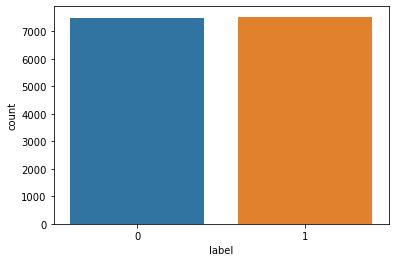

In [11]:
sns.countplot(df.label)
plt.show()

In [12]:
df.label.value_counts()

1    7527
0    7473
Name: label, dtype: int64

In [13]:
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

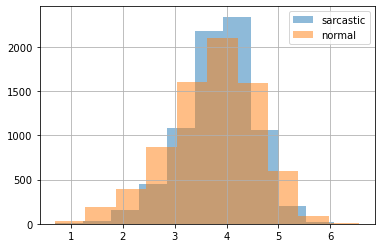

In [14]:
df.loc[df['label'] == 1, 'comment'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
df.loc[df['label'] == 0, 'comment'].str.len().apply(np.log1p).hist(label='normal', alpha=.5)
plt.legend();

In [15]:
#Distribution of lengths for sarcastic and normal comments is almost the same.

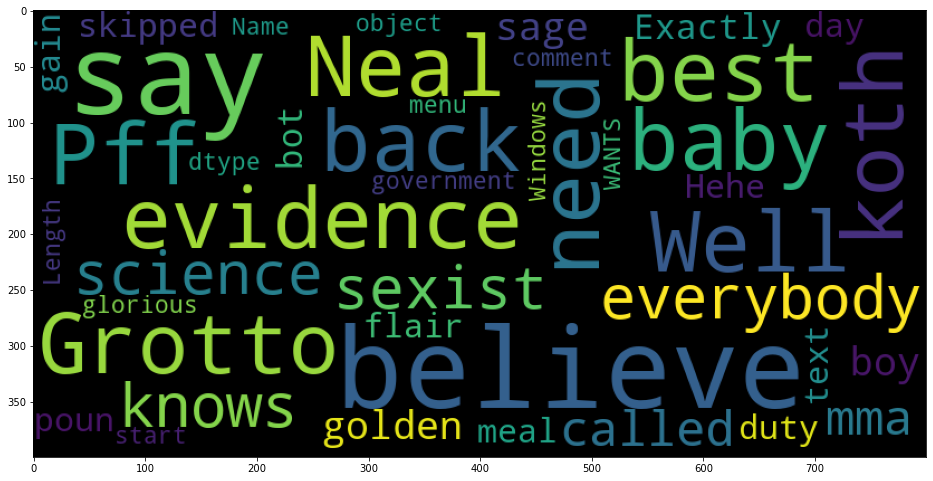

In [16]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(df.loc[df['label'] == 1, 'comment']))
plt.imshow(wordcloud);

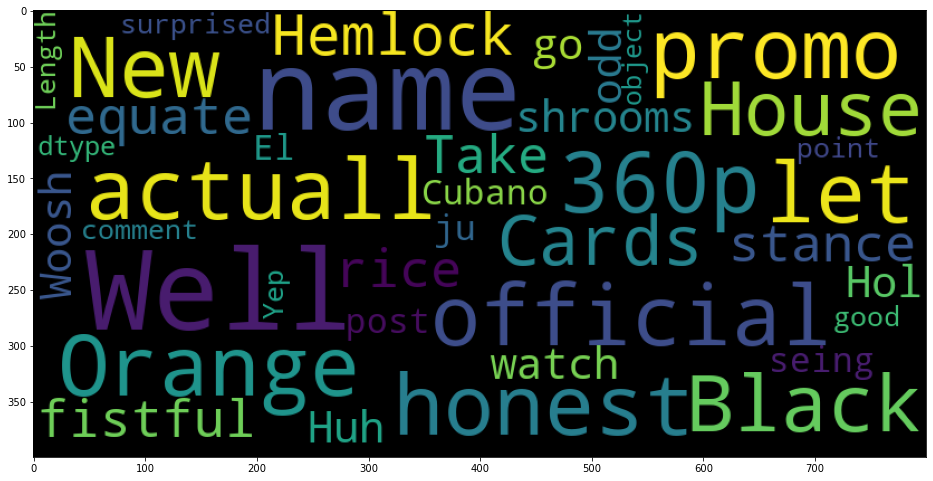

In [17]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(df.loc[df['label'] == 0, 'comment']))
plt.imshow(wordcloud);

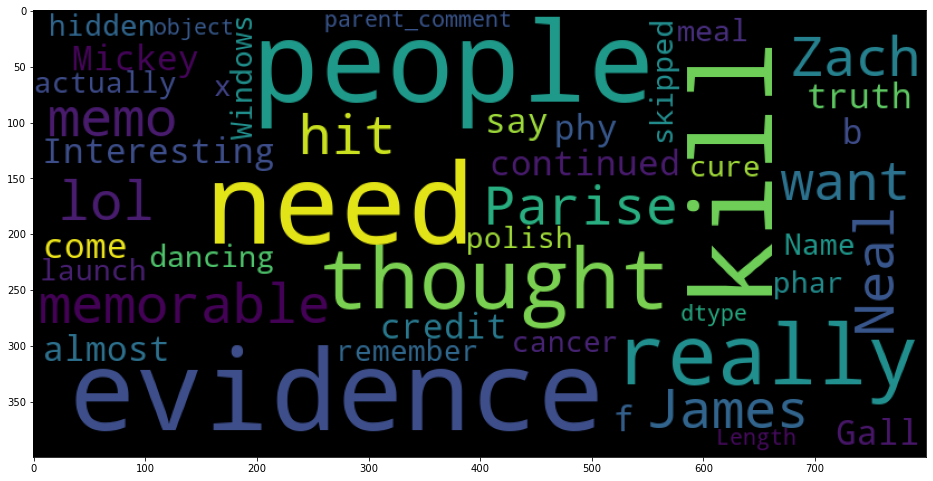

In [18]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(df.loc[df['label'] == 1, 'parent_comment']))
plt.imshow(wordcloud);


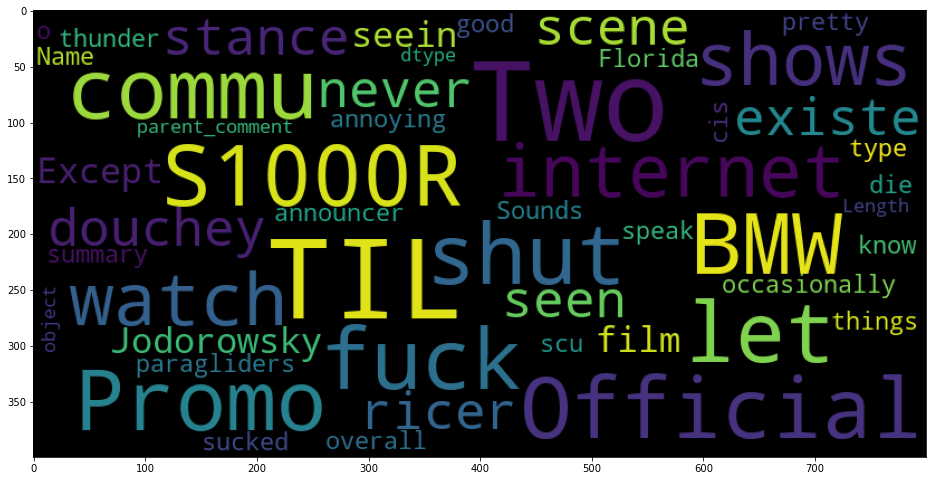

In [19]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(df.loc[df['label'] == 0, 'parent_comment']))
plt.imshow(wordcloud);

In [20]:
df['comments'] = df['comment'] + ' '+ df['parent_comment']

In [21]:
df.columns

Index(['comment', 'down', 'parent_comment', 'score', 'top', 'topic', 'label',
       'comments'],
      dtype='object')

In [22]:
df = df.drop(['comment', 'parent_comment'], axis=1)

In [23]:
df.head()

,down,score,top,topic,label,comments
0,0,2,2,starcitizen,0,"Well, let's be honest here, they don't actuall..."
1,-1,6,-1,EnoughCommieSpam,1,"Well, I didn't need evidence to believe in com..."
2,0,3,3,motorcycles,0,"Who does an ""official promo"" in 360p? 2014 BMW..."
3,0,2,2,hcfactions,1,Grotto koth was the best Not really that memor...
4,0,-5,-5,hockey,1,Neal's back baby James Neal hit on Zach Parise


In [24]:
comments = df.comments

In [25]:
def text_process(text):
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [26]:
text_process("hey ! it's good to see you")

'hey good see'

In [27]:
features = comments.apply(text_process)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer("english")

In [29]:
feature_comments = vectorizer.fit_transform(features)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(feature_comments, df['label'],random_state=23)


In [ ]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#lda = LDA(n_components=1)
#X_train = lda.fit_transform(X_train.todense(), y_train)
#X_test = lda.transform(X_test.todense())

In [43]:
feature_comments.shape

(15000, 34812)

In [56]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')

In [57]:
clf.fit(X_train, y_train)

SVC()

In [58]:
y_pred = clf.predict(X_test)

In [59]:
print(clf.score(X_train, y_train))

0.5146666666666667


In [62]:
conf_matrix_acc(y_test, y_pred)

[[ 132 1363]
 [ 107 1398]]
0.51


In [63]:
# Model evaluation 
def model_scores(y_test, y_pred):
    f1_val = metrics.f1_score(y_test, y_pred)
    prec_val = metrics.precision_score(y_test, y_pred)
    recall_val = metrics.recall_score(y_test, y_pred)
    roc_auc_val = metrics.roc_auc_score(y_test , y_pred)
    print()
    print('F1 ={0}, Precision = {1}, Recall = {2}, ROC_AUC={3}'.format(f1_val, prec_val, recall_val, roc_auc_val))
    print()

    #printing the confusion matrix
    conf_mat =  confusion_matrix(y_test, y_pred, labels=[0,1])
    plot_labels = ['Non-Sarcastic', 'Sarcastic']
    plt.figure(figsize=(4,2))
    sns.heatmap(conf_mat, xticklabels=plot_labels,
     yticklabels=plot_labels, annot=True, fmt='d');
    plt.title('Confusion matrix')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()


F1 =0.5571565802113353, Precision = 0.5377008652657602, Recall = 0.5780730897009967, ROC_AUC=0.5388693207702308



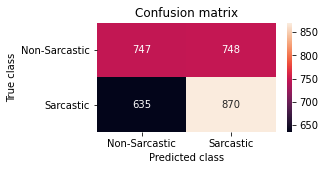

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf2 = GradientBoostingClassifier(n_estimators=30000, learning_rate=0.5, max_features=3, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions_GB = gb_clf2.predict(X_test)
model_scores(y_test, predictions_GB)

In [77]:
X_test

,down,score,top
2349,0,0,0
6505,-1,1,-1
13137,0,3,3
9074,0,4,4
4080,0,9,9
...,...,...,...
12773,0,4,4
5051,0,77,77
1012,0,1,1
6430,0,1,1


In [71]:
tdf = pd.read_csv("test.csv")
tdf.head()

,ID,comment,date,down,parent_comment,score,top,topic,user
0,uid_764784,Meanwhile if I pick my boxer up to move him to...,2016-01,0,Part of the Family Fun,2,2,gifs,Cameltoe-Swampdonkey
1,uid_67552,Thats what you get for using an unfair advanta...,2015-03,0,received a warning for hacking while overclock...,1,1,h1z1,Gothika_47
2,uid_240490,only to be later faced with thousands of dolla...,2010-09,0,Running shoes and race entries. I started runn...,1,1,Frugal,tells
3,uid_56568,What a thoughtful rebuttal to a well articulat...,2015-12,0,"Actually, you should get over your self. There...",-1,-1,CFB,YourToothbrush
4,uid_875860,"Yes, major life experiences that demand a grea...",2014-04,0,"As a bonus, it was with his ex, months after t...",-5,-5,AdviceAnimals,drunken_trophy_wife


In [72]:
tesdf = tdf.drop(['ID', 'user','topic','date','comment', 'parent_comment'], axis=1)

In [76]:
tesdf.columns

Index(['down', 'score', 'top'], dtype='object')

In [74]:
result_df = pd.DataFrame()
result_df['ID'] = tdf['ID']


In [78]:
predictions_GB = gb_clf2.predict(tesdf)

In [79]:
result_df['label'] = predictions_GB

In [80]:
result_df

,ID,label
0,uid_764784,1
1,uid_67552,0
2,uid_240490,0
3,uid_56568,1
4,uid_875860,1
...,...,...
7995,uid_893847,0
7996,uid_34003,1
7997,uid_921530,0
7998,uid_440748,1


In [82]:
result_df.to_csv(r'submission.csv',index=False)

In [53]:
df.columns

Index(['down', 'score', 'top', 'label'], dtype='object')

In [54]:
x = df.drop('label', axis = 1)
y= df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.8, random_state=10)

In [55]:
print(clf.score(X_train, y_train))

ValueError: X.shape[1] = 3 should be equal to 34812, the number of features at training time

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_comments, df['label'],random_state=23)

In [31]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB

In [32]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
mnb = MultinomialNB(alpha=0.2)

In [33]:
print(lr.fit(X_train, y_train))
print(mnb.fit(X_train, y_train))

LogisticRegression(penalty='l1', solver='liblinear')
MultinomialNB(alpha=0.2)


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score 

def conf_matrix_acc(y_true, y_pred):
    print(confusion_matrix(y_true, y_pred))
    print(accuracy_score(y_true, y_pred))

In [35]:
y_pred_lr = lr.predict(X_test)
y_pred_nb = mnb.predict(X_test)

In [36]:
training_data, testing_data = train_test_split(df,random_state = 2000)

In [37]:
Y_train=training_data['label'].values
Y_test=testing_data['label'].values

In [38]:
X_train,X_test,feature_transformer=extract_features(df,field,training_data,testing_data,type=feature_rep)


NameError: name 'extract_features' is not defined

In [39]:
y_pred_lr = lr.predict(X_test)
y_pred_nb = mnb.predict(X_test)

In [40]:
conf_matrix_acc(y_test, y_pred_lr)
conf_matrix_acc(y_test, y_pred_nb)

[[1311  567]
 [ 958  914]]
0.5933333333333334
[[1017  861]
 [ 712 1160]]
0.5805333333333333


In [41]:
print(lr.score(X_train, y_train))

0.6711111111111111


In [42]:
print(mnb.score(X_train, y_train))

0.9456888888888889


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf2 = GradientBoostingClassifier(n_estimators=3000, learning_rate=0.5, max_features=3, max_depth=2, random_state=0)
gb_clf2.fit(X_train, Y_train)
predictions_GB = gb_clf2.predict(X_test)
model_scores(Y_test, predictions_GB)

In [ ]:
# instantiate object
pca = PCA(random_state=100)

In [ ]:
# fit PCA on train data
pca.fit(X_train)

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(2)

In [ ]:
X_train = svd.fit_transform(X_train)

In [ ]:
X_test = svd.fit_transform(X_test)

In [ ]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
mnb = MultinomialNB(alpha=0.2)

In [ ]:
print(lr.fit(X_train, y_train))
#print(mnb.fit(X_train, y_train))

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
conf_matrix_acc(y_test, y_pred_lr)